Imágenes tomadas de: https://www.pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/

# Local Binary Patterns

In [1]:
from skimage import feature
import numpy as np
import cv2
import matplotlib as plt

from img_tools import *

In [2]:
class LocalBinaryPatterns:
    def __init__(self, numPoints, radius):
        # store the number of points and radius
        self.numPoints = numPoints
        self.radius = radius
        
    def describe(self, image, eps=1e-7):
        # compute the Local Binary Pattern representation
        # of the image, and then use the LBP representation
        # to build the histogram of patterns
        lbp = feature.local_binary_pattern(image, self.numPoints,
            self.radius, method="uniform")
        (hist, _) = np.histogram(lbp.ravel(),
            bins=np.arange(0, self.numPoints + 3),
            range=(0, self.numPoints + 2))
        # normalize the histogram
        hist = hist.astype("float")
        hist /= (hist.sum() + eps)
        # return the histogram of Local Binary Patterns
        return hist

In [3]:
desc = LocalBinaryPatterns(24, 8)

In [4]:
imgs_per_prefix = 4
img_prefixes = ['area_rug', 'carpet', 'keyboard', 'wrapping_paper']
imgs = {}
lbp_hists = {}

for prefix in img_prefixes:
    imgs[prefix] = []
    lbp_hists[prefix] = []
    for j in range(imgs_per_prefix):
        imgs[prefix].append( cv2.imread(f'data/img/lbp/{prefix}_{j+1}.png') )
        gray = cv2.cvtColor(imgs[prefix][-1], cv2.COLOR_BGR2GRAY) 
        lbp_hists[prefix].append( desc.describe(gray) )

In [5]:
imgs['area_rug'][0].shape

(310, 412, 3)

In [6]:
lbp_hists['area_rug'][0].shape

(10,)

area_rug


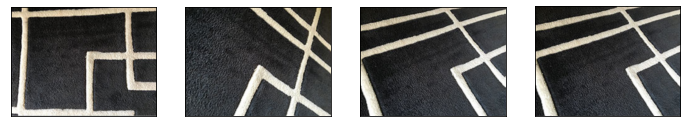

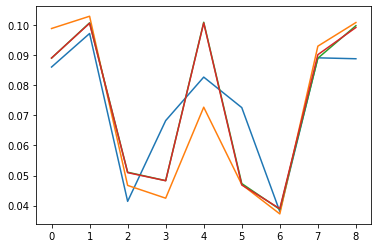

carpet


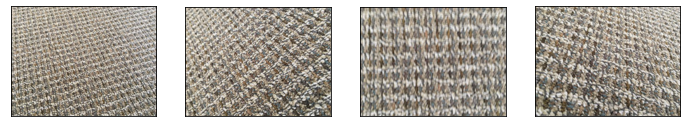

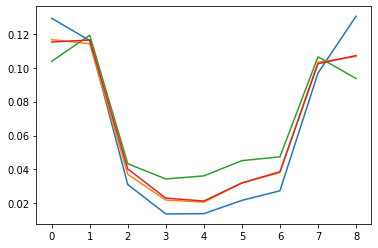

keyboard


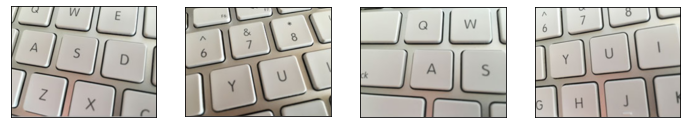

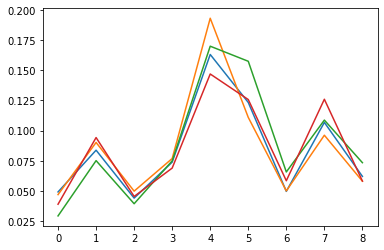

wrapping_paper


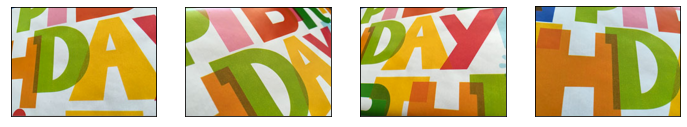

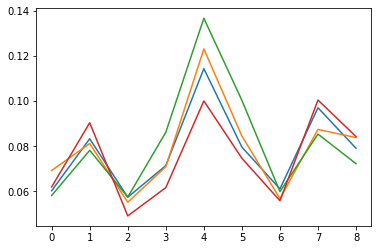

In [7]:
for prefix in img_prefixes:
    print(prefix)
    plt.rcParams['figure.figsize'] = [12, 8]
    plt_multiple_cv_images(imgs[prefix], titles_ena=False)
    plt.rcParams['figure.figsize'] = [6, 4]
    for hist in lbp_hists[prefix]:
        plt.plot(hist[:-1])
    plt.show()